In [4]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
wineq = pd.read_csv("winequality-red.csv")

In [6]:
print(wineq)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [7]:
quality = wineq.quality

In [8]:
winex = wineq.drop(['quality'],axis = 'columns')

In [9]:
mlr = LinearRegression()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(winex, quality, train_size = 0.8, test_size = 0.2)

In [11]:
model = mlr.fit(x_train,y_train)

In [12]:
y_pred = mlr.predict(x_test)
print(mlr.coef_)


[ 8.42026873e-03 -1.06005824e+00 -1.67385813e-01  3.14696947e-02
 -2.25932003e+00  3.75171625e-03 -3.49249515e-03 -1.75588911e+01
 -5.13597982e-01  1.07994353e+00  2.75708661e-01]


In [13]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.37485572710080384
Test score:
0.2754163790733266


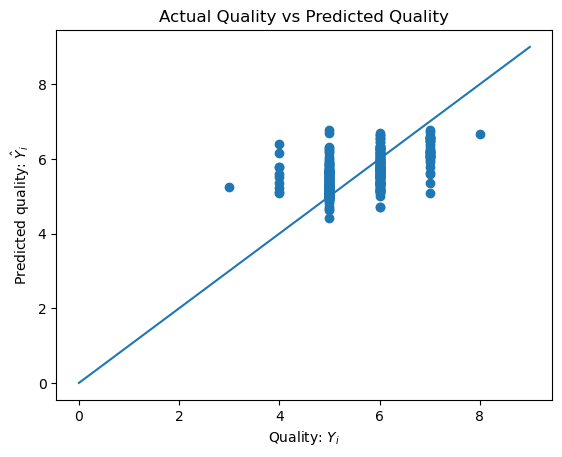

In [14]:
plt.scatter(y_test, y_pred)
plt.plot(range(10), range(10))

plt.xlabel("Quality: $Y_i$")
plt.ylabel("Predicted quality: $\hat{Y}_i$")
plt.title("Actual Quality vs Predicted Quality")

plt.show()


In [15]:
mean = x_train.mean(axis=0) 
x_train -=mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std


In [16]:
def build_model(): 
    dlmodel = models.Sequential() 
    
    dlmodel.add(layers.Dense(64, activation = 'relu',input_shape=(x_train.shape[1],))) 
    dlmodel.add(layers.Dense(64, activation='relu')) 
    dlmodel.add(layers.Dense(1)) 
    dlmodel.compile(optimizer='rmsprop',loss='mse', metrics=['mae']) 
    return dlmodel